### Домашнє завдання



В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.



Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:



кількість шарів;
кількість нейронів;
функції активації;
кількість епох;
розмір батчу;
вибір оптимізатора;
різні техніки регуляризації і т.д.


Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.



Рішення оформіть у вигляді окремого ноутбука.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.backend import clear_session

Задамо початкові параметри архітектури нейронної мережи та параметри навчання значеннями з попереднього ДЗ:

In [2]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = (28, 28) # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів

n_hidden_1 = 128 # кількість нейронів 1-го шару
n_hidden_2 = 256 # кількість нейронів 2-го шару

Завантажимо датасет fashion mnist та нормалізуємо дані:

In [3]:
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

Побудуємо модель, таку, як у попередньому ДЗ:

In [4]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='sigmoid'),
    layers.Dense(n_hidden_2, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136074 (531.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Проведемо навчання побудованої моделі:

In [5]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

Epoch 1/20


235/235 [==============================] - 2s 7ms/step - loss: 2.3424 - accuracy: 0.1353 - val_loss: 2.3072 - val_accuracy: 0.1580
Epoch 2/20
235/235 [==============================] - 1s 6ms/step - loss: 2.3011 - accuracy: 0.1716 - val_loss: 2.2976 - val_accuracy: 0.1567
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 2.2953 - accuracy: 0.1575 - val_loss: 2.2932 - val_accuracy: 0.1695
Epoch 4/20
235/235 [==============================] - 2s 6ms/step - loss: 2.2911 - accuracy: 0.1937 - val_loss: 2.2891 - val_accuracy: 0.2162
Epoch 5/20
235/235 [==============================] - 2s 6ms/step - loss: 2.2869 - accuracy: 0.2434 - val_loss: 2.2849 - val_accuracy: 0.2190
Epoch 6/20
235/235 [==============================] - 2s 6ms/step - loss: 2.2827 - accuracy: 0.2541 - val_loss: 2.2808 - val_accuracy: 0.2896
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 2.2786 - accuracy: 0.2941 - val_loss: 2.2766 - val_accuracy: 0.3241
Epoc

Візуаліщуємо результати процесу навчання:

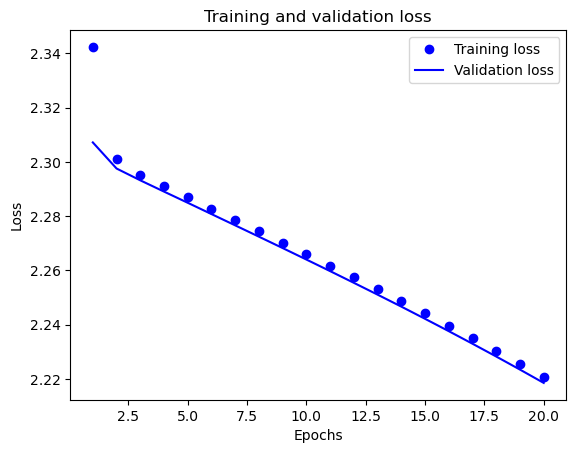

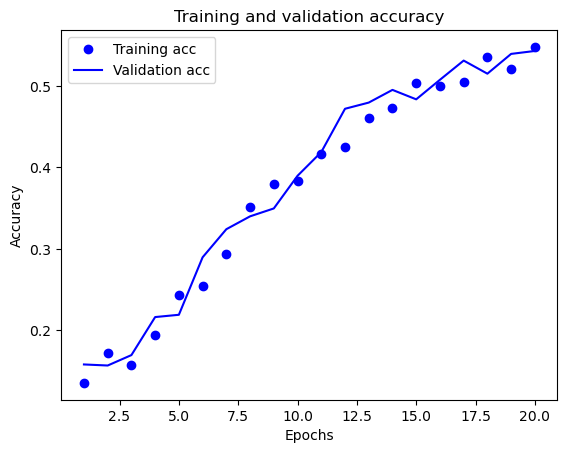

In [6]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Як бачимо, точність не вражає, але судячи з графіків, модель недонавчена, що очікувано для взятого невеликого значення learning rate. Спробуємо збільшити кількість епох:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136074 (531.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 2.3771 - accuracy: 0.1287 - val_loss: 2.3170 - val_accuracy: 0.1409
Epoch 

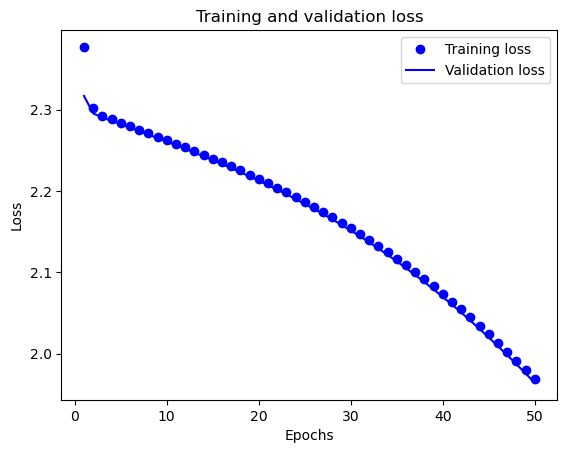

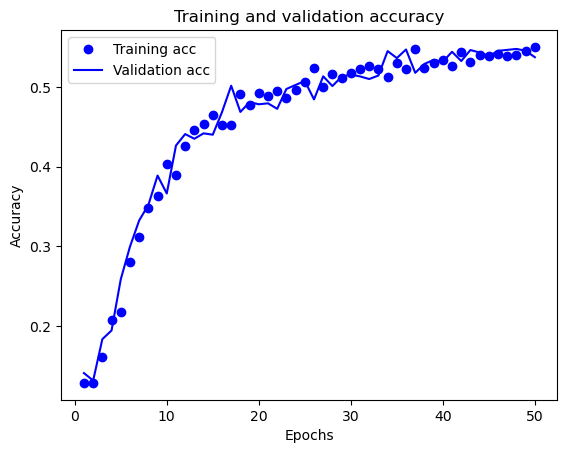

In [7]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='sigmoid'),
    layers.Dense(n_hidden_2, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Схоже, що процес навчання потрапив у пастку локального мінімуму. Спробуємо збільшити learning rate:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136074 (531.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 2.2850 - accuracy: 0.2114 - val_loss: 2.2539 - val_accuracy: 0.3082
Epoch 

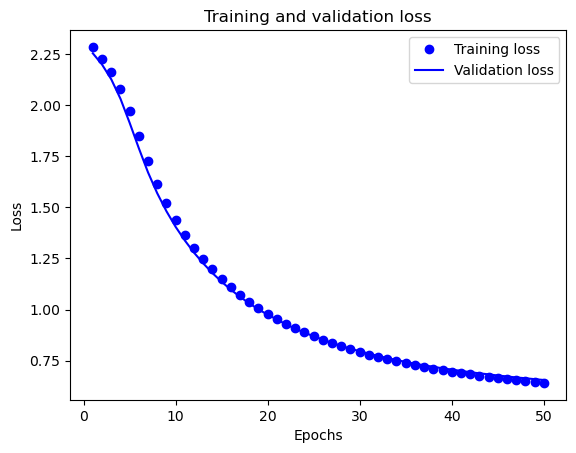

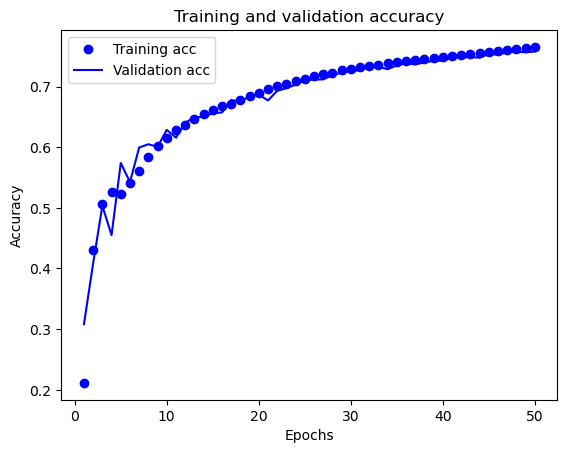

In [8]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='sigmoid'),
    layers.Dense(n_hidden_2, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Результат покращився, але збіжність алгоритму досить повільна. Спробуємо алгоритм ADAM:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136074 (531.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.9202 - accuracy: 0.7020 - val_loss: 0.5578 - val_accuracy: 0.7993
Epoch 

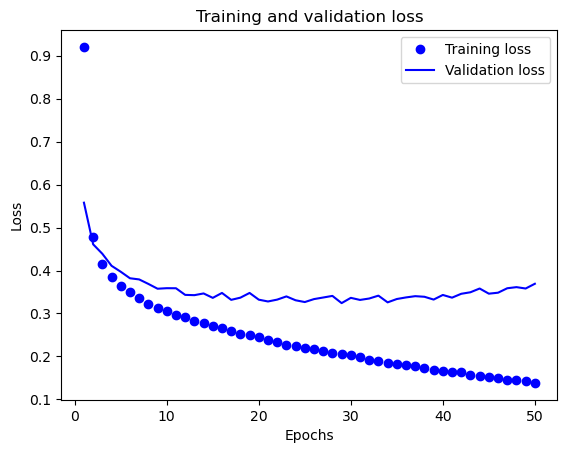

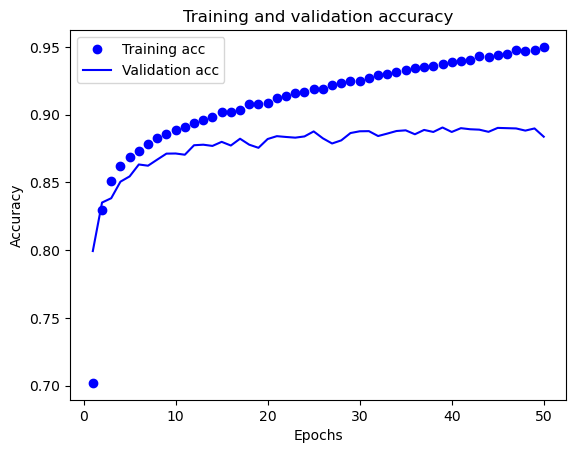

In [9]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='sigmoid'),
    layers.Dense(n_hidden_2, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Тепер ми досягли 89% точності на тестових даних та 95% на навчальних. При чому точність на тестових даних майже не зростала 3 20-ї епохи, а точність на тренувальних продовжує зростати, що говорить про перенавчання моделі. Спробуємо зменшити batch_size:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136074 (531.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
938/938 [==============================] - 5s 5ms/step - loss: 0.6399 - accuracy: 0.7770 - val_loss: 0.4455 - val_accuracy: 0.8400
Epoch 

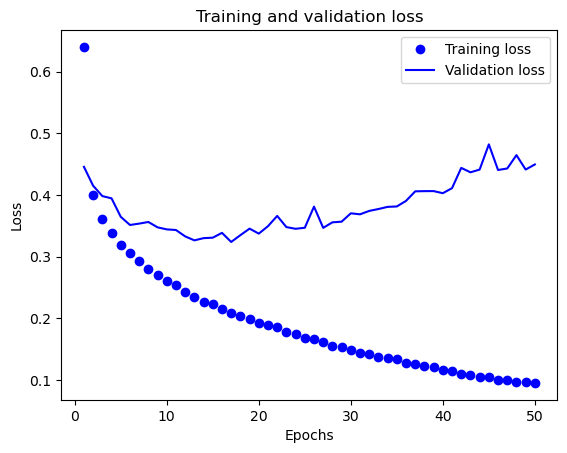

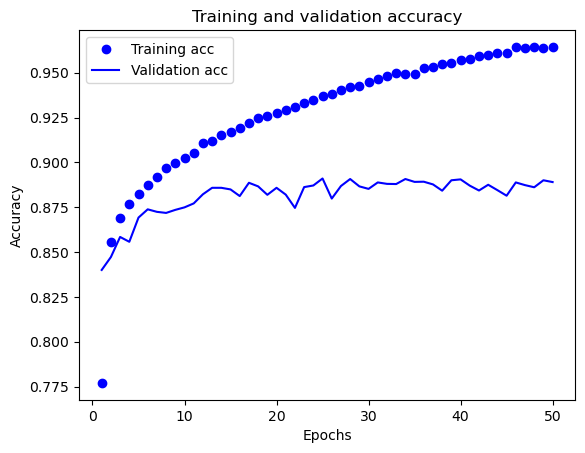

In [10]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='sigmoid'),
    layers.Dense(n_hidden_2, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Результат майже не змінився. Спробуємо ще зменшити batch_size:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136074 (531.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
7500/7500 [==============================] - 26s 3ms/step - loss: 0.5014 - accuracy: 0.8187 - val_loss: 0.4475 - val_accuracy: 0.8381
Epo

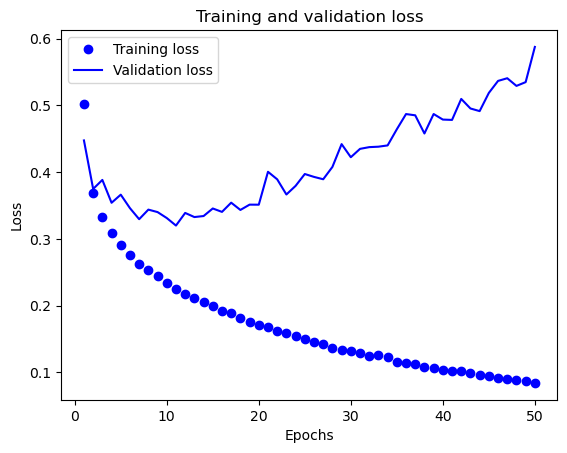

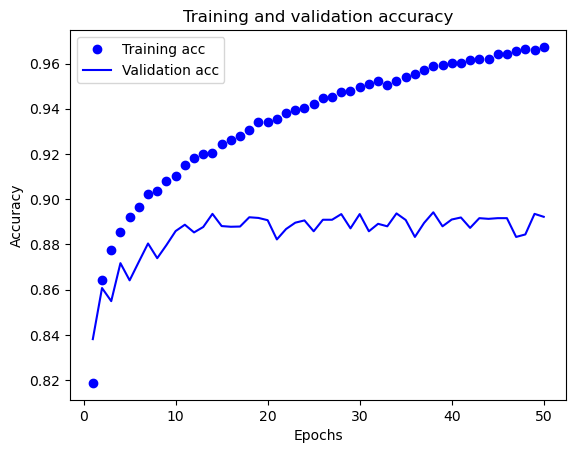

In [11]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='sigmoid'),
    layers.Dense(n_hidden_2, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=8,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Картина та ж сама. Повернемо попереднє значення batch_size та спробуємо полегшити модель, прибравши один з прихованих шарів:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 0.5955 - accuracy: 0.8040 - val_loss: 0.4694 - val_accuracy: 0.8325
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.4122 - accuracy: 0.8525 - val_loss: 0.4172 - val_accuracy: 0.8

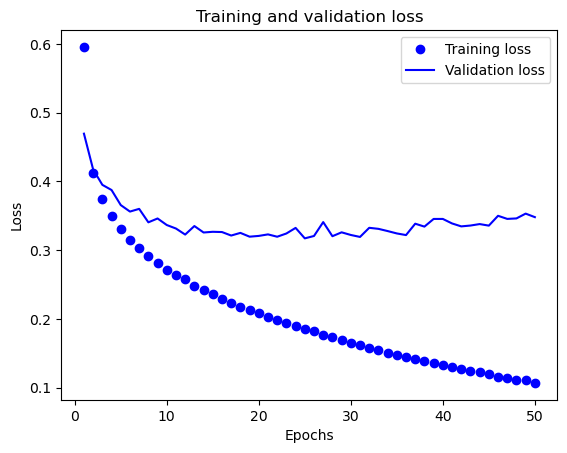

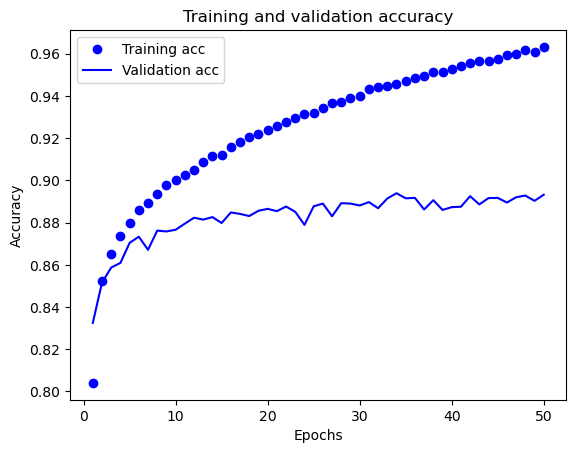

In [12]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Як бачимо, результат знову не змінився. Тобто початкова складність нашої моделі була надлишковою. Спробуємо змінити активаційну функцію:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 0.5203 - accuracy: 0.8202 - val_loss: 0.4250 - val_accuracy: 0.8483
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3839 - accuracy: 0.8635 - val_loss: 0.3942 - val_accuracy: 0.8

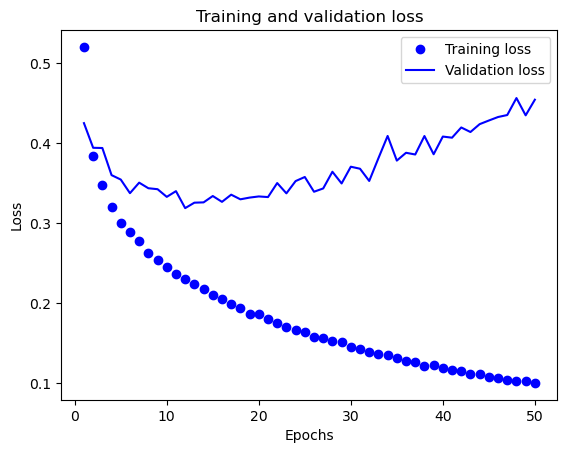

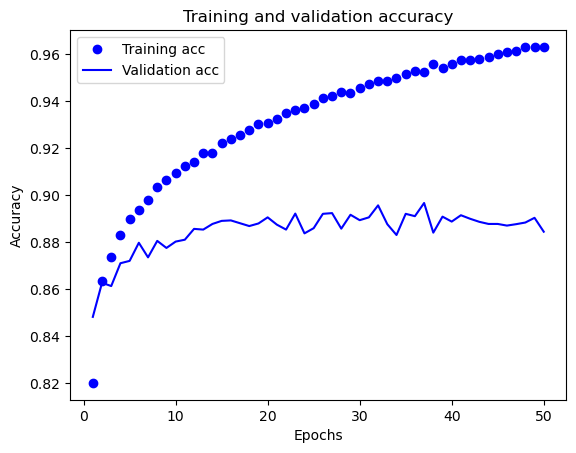

In [13]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Результат трохи погіршився. Спробуємо ще змінити активаційну функцію, на цей раз на leaky relu:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 0.5205 - accuracy: 0.8184 - val_loss: 0.4492 - val_accuracy: 0.8413
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3959 - accuracy: 0.8590 - val_loss: 0.4039 - val_accuracy: 0.8

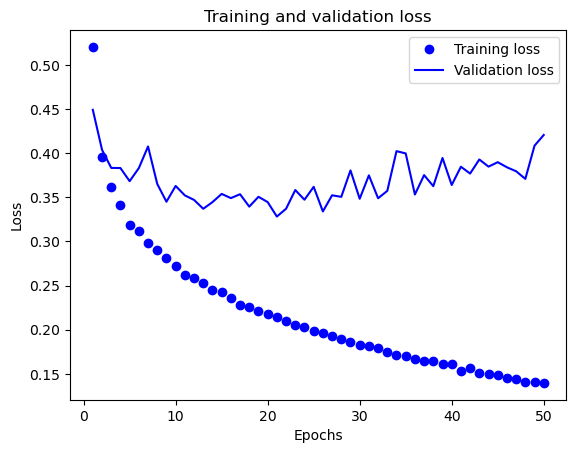

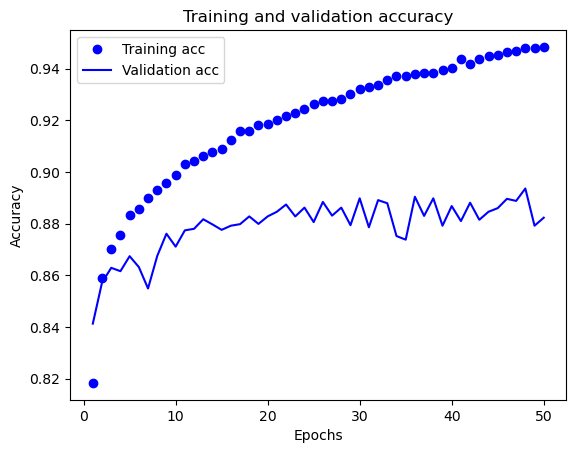

In [14]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='leaky_relu'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Результат знову не покращився. Спробуємо L1 регуляризацію:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
938/938 [==============================] - 5s 4ms/step - loss: 2.9959 - accuracy: 0.6980 - val_loss: 1.3391 - val_accuracy: 0.7373
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 1.2716 - accuracy: 0.7487 - val_loss: 1.2142 - val_accuracy: 0.7

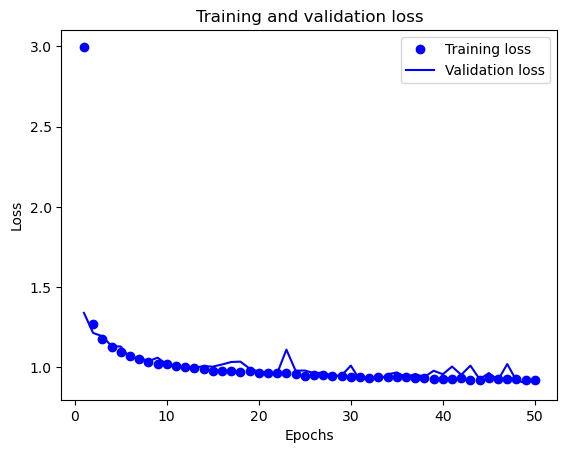

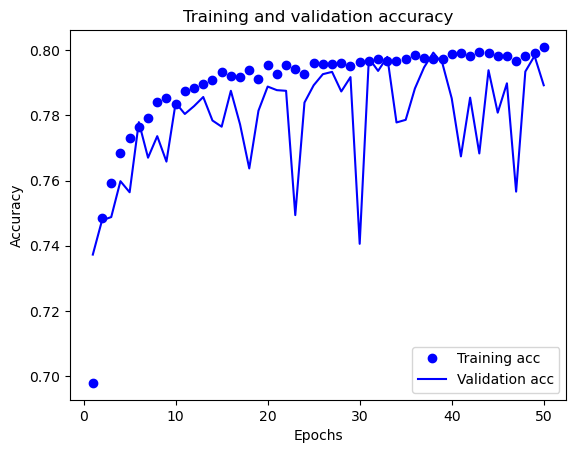

In [15]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Результат значно погіршився. Спробуємо L2 регуляризацію:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
938/938 [==============================] - 5s 4ms/step - loss: 0.9668 - accuracy: 0.7969 - val_loss: 0.6607 - val_accuracy: 0.8103
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.6262 - accuracy: 0.8204 - val_loss: 0.6359 - val_accuracy: 0.8

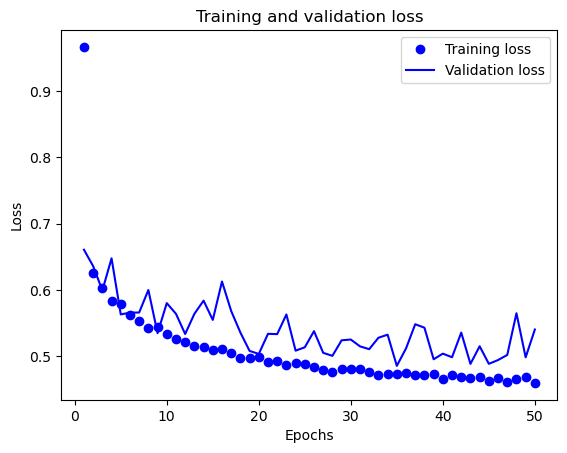

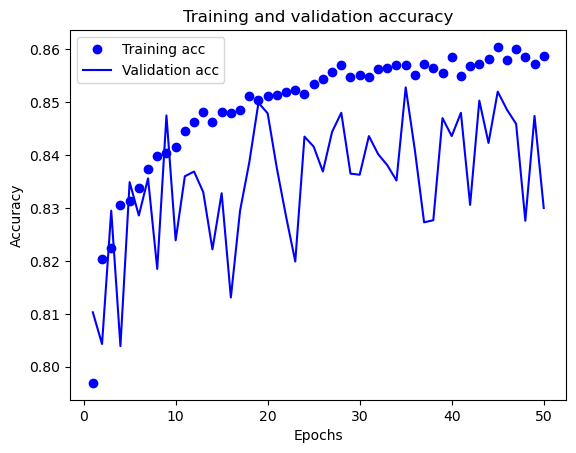

In [16]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Результат знову гірший. Спробуємо elastic net регуляризацію:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 3.0392 - accuracy: 0.6939 - val_loss: 1.3744 - val_accuracy: 0.7272
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 1.2839 - accuracy: 0.7428 - val_loss: 1.2370 - val_accuracy: 0.7

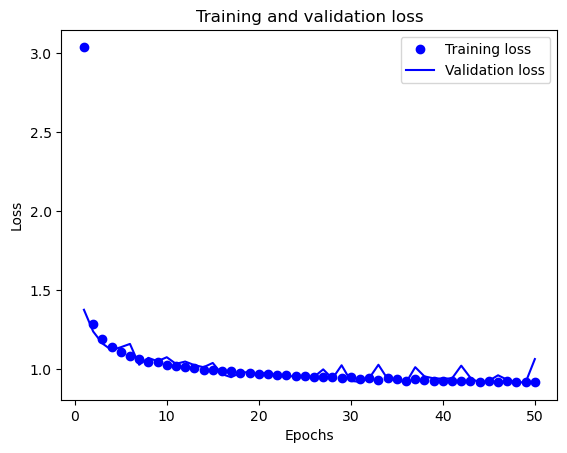

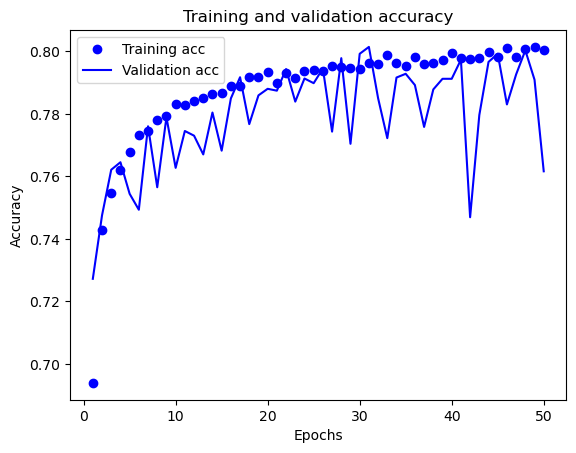

In [17]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01, 0.01)),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Регуляризація не покращує нашу моедль. Спробуємо збільшити кількість нейронів у прихованому шарі:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
938/938 [==============================] - 7s 7ms/step - loss: 0.4823 - accuracy: 0.8296 - val_loss: 0.4624 - val_accuracy: 0.8384
Epoch 2/50
938/938 [==============================] - 7s 8ms/step - loss: 0.3653 - accuracy: 0.8670 - val_loss: 0.3942 - val_accuracy: 0.8582


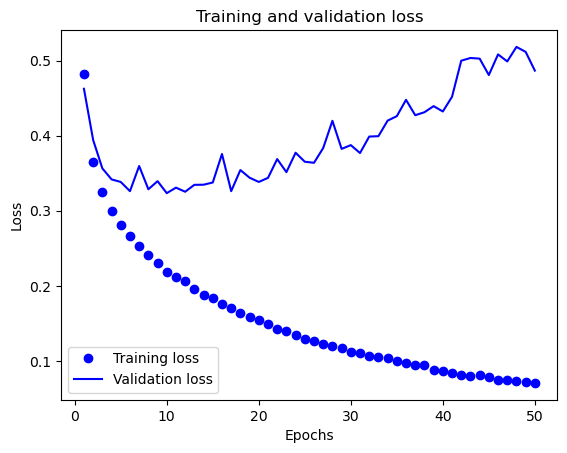

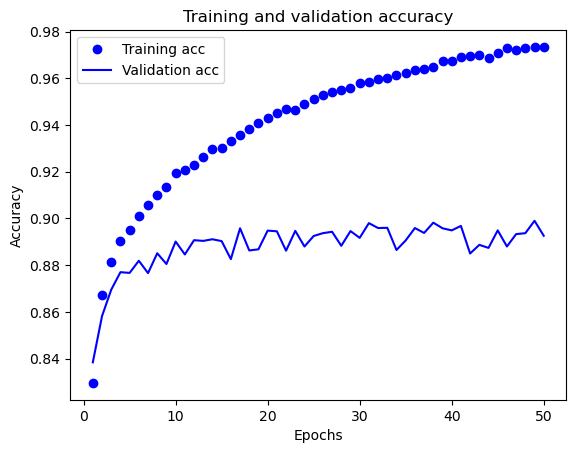

In [18]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Здається, збільшення кількості нейронів не дало покращення, можливо дуже невелике. Але спробуємо тепер зменшити їх кількість:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 0.5314 - accuracy: 0.8172 - val_loss: 0.4349 - val_accuracy: 0.8469
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3920 - accuracy: 0.8614 - val_loss: 0.3961 - val_accuracy: 0.8

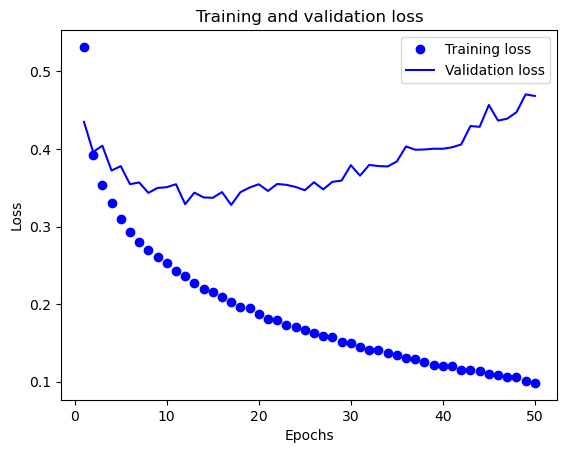

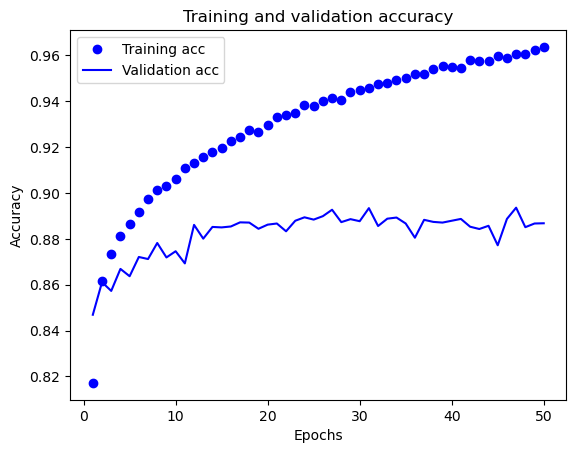

In [19]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Схоже, що різниці знову майже немає, хоча й схоже, що збільшення давало ледь помітне покращення моделі. Але спробуємо ще додати дропаут:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
938/938 [==============================] - 6s 6ms/step - loss: 0.5314 - accuracy: 0.8134 - val_loss: 0.4431 - val_accuracy: 0.8364
Epoch 

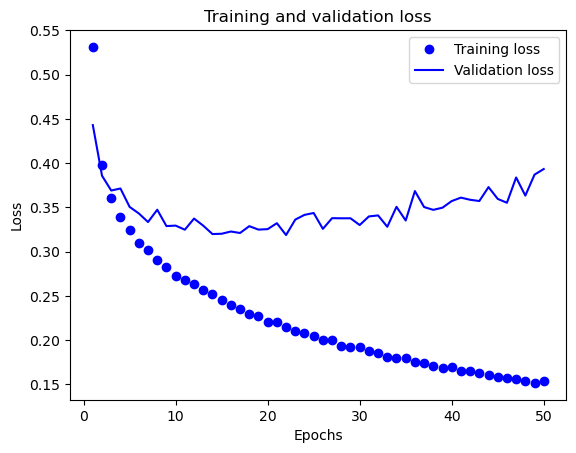

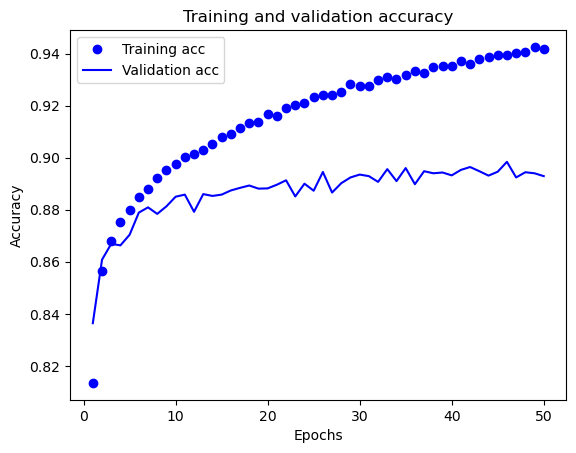

In [20]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Позитивний вплив дропауту ледь помітний. Спробуємо збільшити кількість нейронів разом з дропаутом, а разом з цим збільшимо кількість епох, batch_size та повернемо сигмоїду на прихованому шарі:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
235/235 [==============================] - 3s 10ms/step - loss: 0.7415 - accuracy: 0.7374 - val_loss: 0.5277 - val_accuracy: 0.8146
Epoch 2/

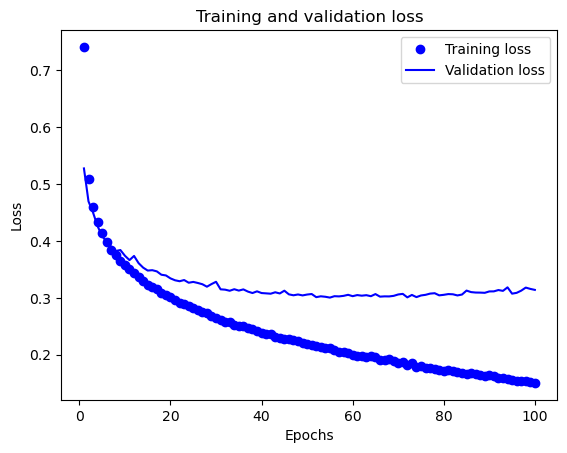

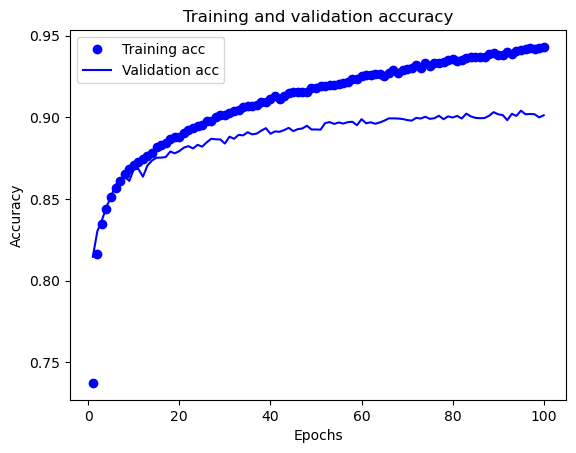

In [21]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(512, activation='sigmoid'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=256,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Збільшимо ще кількість нейронів, дропаут та кількість епох:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 814090 (3.11 MB)
Trainable params: 814090 (3.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
235/235 [==============================] - 4s 15ms/step - loss: 0.7939 - accuracy: 0.7138 - val_loss: 0.5336 - val_accuracy: 0.8064
Epoch 2/

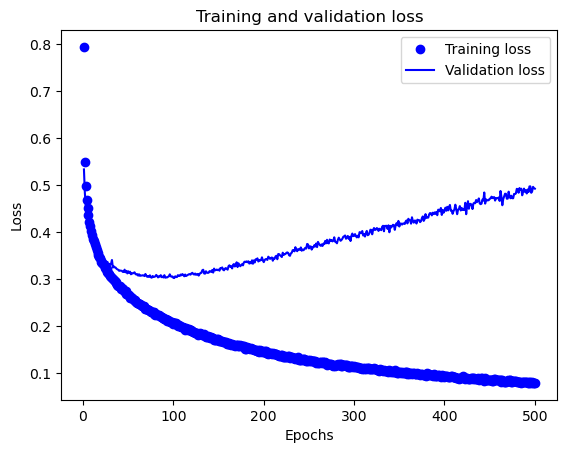

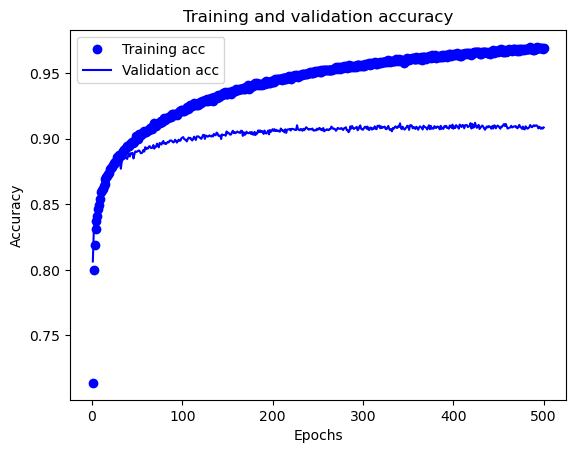

In [22]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(1024, activation='sigmoid'),
    layers.Dropout(0.75),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=500,
    batch_size=256,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Нам вдалося досягти 91% точності на тестовій вибірці. Спробуємо ще один варіант - додамо другий прихований шар з кількістю нейронів, що відповідає значенню дропауту на першому:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1068810 (4.08 MB)
Trainable params: 1068810 (4.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
235/23

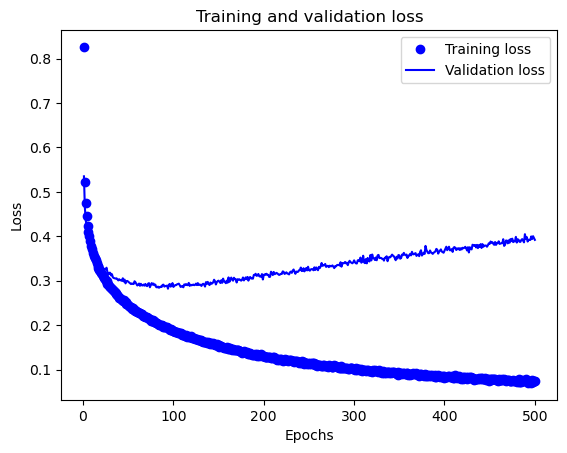

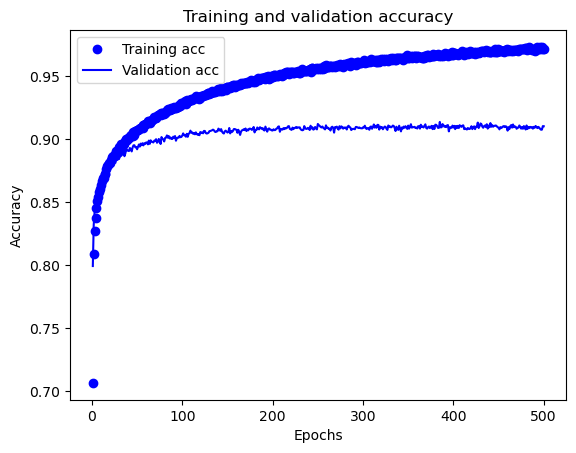

In [23]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(1024, activation='sigmoid'),
    layers.Dropout(0.75),
    layers.Dense(256, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=500,
    batch_size=256,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Висновок
В процесі експериментування нам вдалося досягти 91% точності моделі на тестових даних, але схоже ціною перенавчання.